# Chapter 10: Statistical Thermodynamics

## Learning Objectives

By the end of this lecture, you should be able to

1. Define the microstate and macrostate of a system.
2. Apply the Boltzmann distribution to calculate the probability of a system being in a given microstate.
3. Explain the role of the partition function in calculating the thermodynamic properties of a system.

## Introduction to Statistical Thermodynamics

In the previous lecture, we discussed the laws of thermodynamics, which describe the behavior of macroscopic systems in terms of energy, work, and heat. In this lecture, we will take a different approach to understanding thermodynamics by considering the behavior of individual particles that make up a system. This approach is known as **statistical thermodynamics** or **statistical mechanics**. Statistical thermodynamics provides a microscopic view of thermodynamic systems by considering the statistical distribution of particles in different energy states. By understanding the behavior of individual particles, we can derive macroscopic thermodynamic properties such as temperature, pressure, and entropy.

## Microstates and Macrostates

In statistical thermodynamics, we distinguish between two important concepts: **microstates** and **macrostates**.

![Difference between microstates and macrostates](microstate_macrostate.png)

As shown above, a **microstate** refers to the specific configuration of a system at the microscopic level, including the positions and velocities of individual particles. For example, in a gas, a microstate would specify the position (center of each arrow) and velocity (direction of each arrow) of each gas molecule. A **macrostate**, on the other hand, refers to the overall properties of the system that can be observed and measured macroscopically, such as temperature, pressure, and volume. The macrostate of a system is determined by the collection of microstates that are consistent with the macroscopic properties of the system.

## Boltzmann Distribution

````{margin}
```{note}
A **heat bath** is a large reservoir of particles at a constant temperature $T$ that can exchange energy with the system under consideration.
```
````

For a closed system of fixed volume $V$, in thermal equilibrium with a heat bath at temperature $T$, the probability of finding the system in a particular microstate $i$ with energy $E_i$ is given by the **Boltzmann distribution**

$$
P_i = \frac{e^{-E_i/k_{\rm B}T}}{Z}
$$

where $k_{\rm B}$ is the Boltzmann constant, $T$ is the temperature of the heat bath, and $Z$ is the partition function defined as

$$
Z = \sum_i e^{-E_i/k_{\rm B}T}
$$

The partition function $Z$ is a normalization constant that ensures that the probabilities $P_i$ sum to 1 over all microstates of the system.

### Example: Two-State System

Consider a simple two-state system with energies $E_1 = 0$ and $E_2 = \epsilon$. The partition function for this system is given by

$$
Z = e^{-0/k_{\rm B}T} + e^{-\epsilon/k_{\rm B}T} = 1 + e^{-\epsilon/k_{\rm B}T}
$$

The probability of the system being in the ground state ($E_1 = 0$) is

$$
P_1 = \frac{e^{-0/k_{\rm B}T}}{Z} = \frac{1}{1 + e^{-\epsilon/k_{\rm B}T}}
$$

and the probability of the system being in the excited state ($E_2 = \epsilon$) is

$$
P_2 = \frac{e^{-\epsilon/k_{\rm B}T}}{Z} = \frac{e^{-\epsilon/k_{\rm B}T}}{1 + e^{-\epsilon/k_{\rm B}T}}
$$

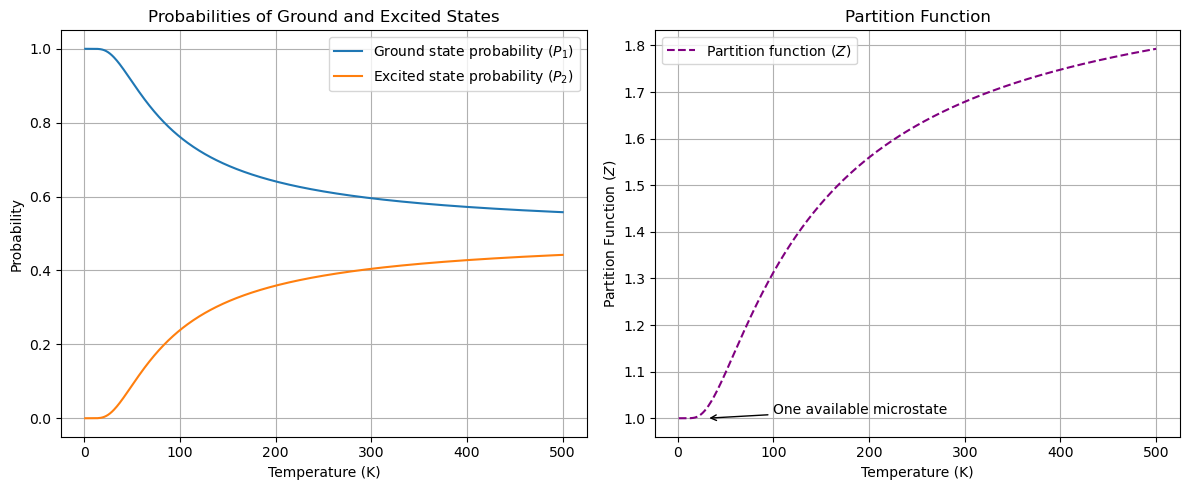

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k, eV

# Constants
k_B = k / eV  # Boltzmann constant in eV/K
epsilon = 0.01 # Energy difference in eV

# Temperature range (in Kelvin)
T = np.linspace(1, 500, 500)

# Partition function Z
Z = 1 + np.exp(-epsilon / (k_B * T))

# Probabilities of ground state (P1) and excited state (P2)
P1 = 1 / Z
P2 = np.exp(-epsilon / (k_B * T)) / Z

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting probabilities
ax1.plot(T, P1, label='Ground state probability ($P_1$)')
ax1.plot(T, P2, label='Excited state probability ($P_2$)')
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Probability')
ax1.set_title('Probabilities of Ground and Excited States')
ax1.legend()
ax1.grid(True)

# Plotting partition function
ax2.plot(T, Z, label='Partition function ($Z$)', color='purple', linestyle='--')
ax2.annotate('One available microstate', xy=(30, 1), xytext=(100, 1.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('Partition Function ($Z$)')
ax2.set_title('Partition Function')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

The plot above shows the probabilities of the ground state ($P_1$) and excited state ($P_2$) as a function of temperature, as well as the partition function $Z$. As the temperature increases, the probability of the system being in the excited state increases, while the probability of the system being in the ground state decreases. The partition function $Z$ is a measure of the total number of microstates available to the system. As the temperature increases, the partition function also increases, indicating that the system has more available microstates at higher temperatures.

```{admonition} Critical Thinking
- What happens to the probabilities $P_1$ and $P_2$ at 100 K if $\epsilon$ is increased?
- How many microstates should be available to the system at very high temperatures?
```

## Thermodynamic Properties from the Partition Function

The partition function $Z$ contains all the information needed to calculate the thermodynamic properties of a system.

### Average Energy and Internal Energy

For example, the average energy $\langle E \rangle$ of the system is given by

$$
\langle E \rangle = -\frac{\partial}{\partial \beta} \ln Z
$$

where $\beta = 1/(k_{\rm B}T)$. The microstate-averaged energy $\langle E \rangle$ is a measure of the internal energy of the system in a given macrostate.

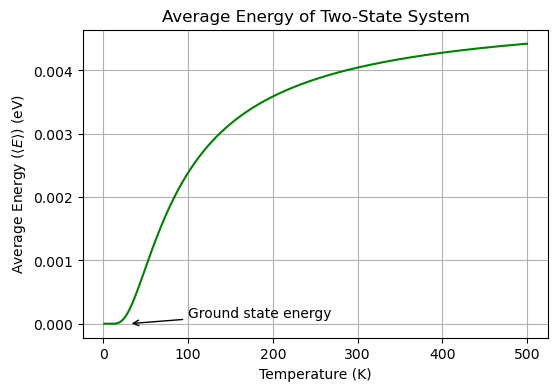

In [2]:
# Average energy
E_avg = -np.gradient(np.log(Z), 1 / (k_B * T))

# Plotting average energy
plt.figure(figsize=(6, 4))
plt.plot(T, E_avg, color='green')
plt.annotate('Ground state energy', xy=(30, 0), xytext=(100, 0.0001),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlabel('Temperature (K)')
plt.ylabel('Average Energy ($\\langle E \\rangle$) (eV)')
plt.title('Average Energy of Two-State System')
plt.grid(True)
plt.show()

```{admonition} Critical Thinking
What is the average energy of the two-state system at very high temperatures?
```

### Heat Capacity at Constant Volume

The average energy $\langle E \rangle$ can be used to calculate other thermodynamic properties such as the heat capacity $C_V$ of the system. The heat capacity is defined as

$$
C_V = \frac{\partial \langle E \rangle}{\partial T}
$$

and provides information about how the internal energy of the system changes with temperature.

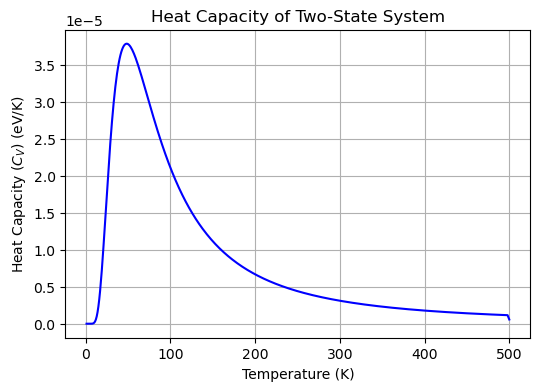

In [3]:
# Heat capacity
C_V = np.gradient(E_avg, T)

# Plotting heat capacity
plt.figure(figsize=(6, 4))
plt.plot(T, C_V, color='blue')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity ($C_V$) (eV/K)')
plt.title('Heat Capacity of Two-State System')
plt.grid(True)
plt.show()

The plot above shows the heat capacity $C_V$ of the two-state system as a function of temperature. The heat capacity is zero at low temperatures, peaks at intermediate temperatures, and approaches zero at high temperatures. The peak in the heat capacity corresponds to the temperature at which the system undergoes an order-disorder transition between the ground and excited states.

```{admonition} Critical Thinking
What happens to the peak in the heat capacity if the energy difference $\epsilon$ between the ground and excited states is increased?
```

## Free Energy and Entropy

The partition function $Z$ can also be used to calculate the **free energy** $F$ of the system, which is defined as

$$
A = -k_{\rm B}T \ln Z
$$

The free energy $F$ is a measure of the energy available to do work in the system. The **entropy** $S$ of the system can be calculated from the free energy as

$$
S = -\left(\frac{\partial A}{\partial T}\right)_V
$$

The entropy $S$ is a measure of the disorder or randomness of the system and provides information about the number of microstates available to the system.

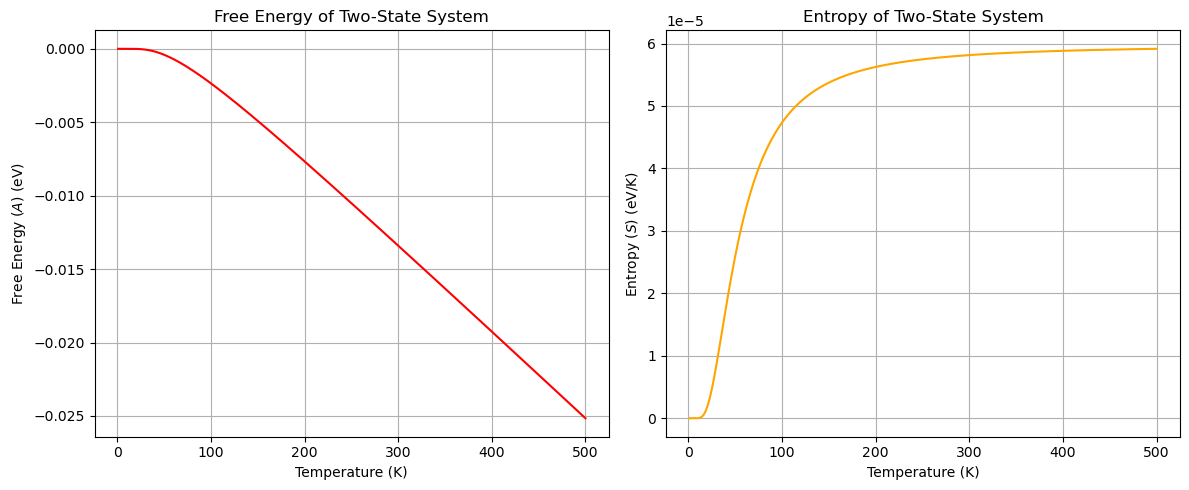

In [4]:
# Free energy
A = -k_B * T * np.log(Z)

# Entropy
S = -np.gradient(A, T)

# Plotting free energy and entropy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting free energy
ax1.plot(T, A, color='red')
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Free Energy ($A$) (eV)')
ax1.set_title('Free Energy of Two-State System')
ax1.grid(True)

# Plotting entropy
ax2.plot(T, S, color='orange')
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel(r'Entropy ($S$) (eV/K)')
ax2.set_title('Entropy of Two-State System')
ax2.grid(True)

plt.tight_layout()
plt.show()

The plots above show the free energy $A$ and entropy $S$ of the two-state system as a function of temperature. The free energy decreases with increasing temperature, while the entropy increases with temperature.

```{admonition} Critical Thinking
At very high temperatures, the probability of the system being in either the ground or excited state approaches 1/2. For conditions where all microstates are equally probable, the entropy of the system can be calculated as $S = k_{\rm B} \ln \Omega$, where $\Omega$ is the total number of microstates available to the system. How does the entropy calculated from the partition function compare to the entropy calculated from the total number of microstates at high temperatures?
```

## Summary

In this lecture, we introduced the concept of statistical thermodynamics, which provides a microscopic view of thermodynamic systems by considering the statistical distribution of particles in different energy states. We discussed the distinction between microstates and macrostates and introduced the Boltzmann distribution, which describes the probability of a system being in a given microstate. We also introduced the partition function, which is used to calculate the thermodynamic properties of a system, such as the average energy, heat capacity, free energy, and entropy. By understanding the behavior of individual particles in a system, we can derive macroscopic thermodynamic properties and gain insights into the behavior of complex systems.